<center> <b><font size="6">CRIME PREDICTION</font></b></center>



#### Read file into pandas dataframe:

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import os
import math
from sklearn import tree
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pydotplus
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy import stats

%matplotlib inline
dicPath = os.getcwd()
dicPathClean = os.path.join(dicPath,'Crime Prediction Data','communities-crime-clean.csv')
dicPathDirty = os.path.join(dicPath,'Crime Prediction Data','communities-crime-full.csv')

In [87]:
df=pd.read_csv(dicPathClean)
dfd = pd.read_csv(dicPathDirty)



Part I Explore Data
-----------------

In [88]:
df.shape

(1993, 104)

In [89]:
dfd.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


### Explore the Dirty data

#### Extra features:

In [91]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)

array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [92]:
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df.corr()['ViolentCrimesPerPop'].abs().nlargest(5)

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
PctKids2Par            0.739231
PctFam2Par             0.707438
racePctWhite           0.685631
Name: ViolentCrimesPerPop, dtype: float64

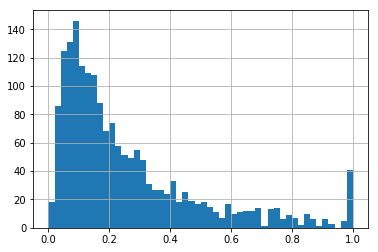

In [94]:
df['PctIlleg'].sample(n = 1800).hist(bins  = 50)

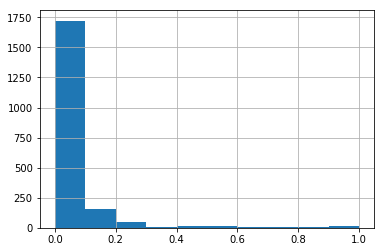

In [95]:
df.population.hist()

# 1. Decision Trees
-------------------------------------

### 1.a) Percentage data

#### Creating highCrime Feature:

In [96]:
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)


#### Train and Target Features:

In [97]:
X = df.drop('ViolentCrimesPerPop',1).drop('highCrime',1).drop('communityname',1).drop('state',1).drop('fold',1)
y = df['highCrime']

In [98]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
print('High crime community is',pos_percentage*100,'%')

High crime community is 62.719518314099346 %


#### Decide the depth for tree:
#### Used Validationcurve:[http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html] that has two outputs scores: 
#### 1) Entire dataset  - train_scores
#### 2) Cross Validated dataset - test_scores

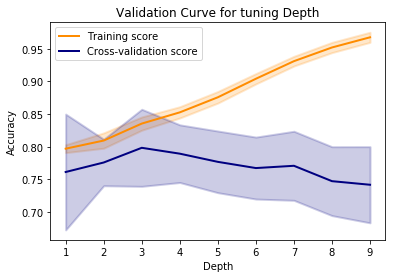

In [99]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve for tuning Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Conclusion: Depth = 3 would be best option, since the accuarcy for 10 cv is higher compared to other depth.

## 1.b DecisionTreeClassifier Model:

#### Prediction using the entire dataset

In [214]:
dtclf = tree.DecisionTreeClassifier(max_depth= 3)
dtclf = dtclf.fit(X,y)

In [216]:
np.count_nonzero(dtclf.feature_importances_)

4

#### Since we train the 3 depth tree, there are only 4 features we condsider to do the classificaiton

In [158]:
print(accuracy_score(y, dtclf.predict(X)))
print(precision_score(y, dtclf.predict(X)))
print(recall_score(y, dtclf.predict(X)))

0.83592574009
0.900260190807
0.8304


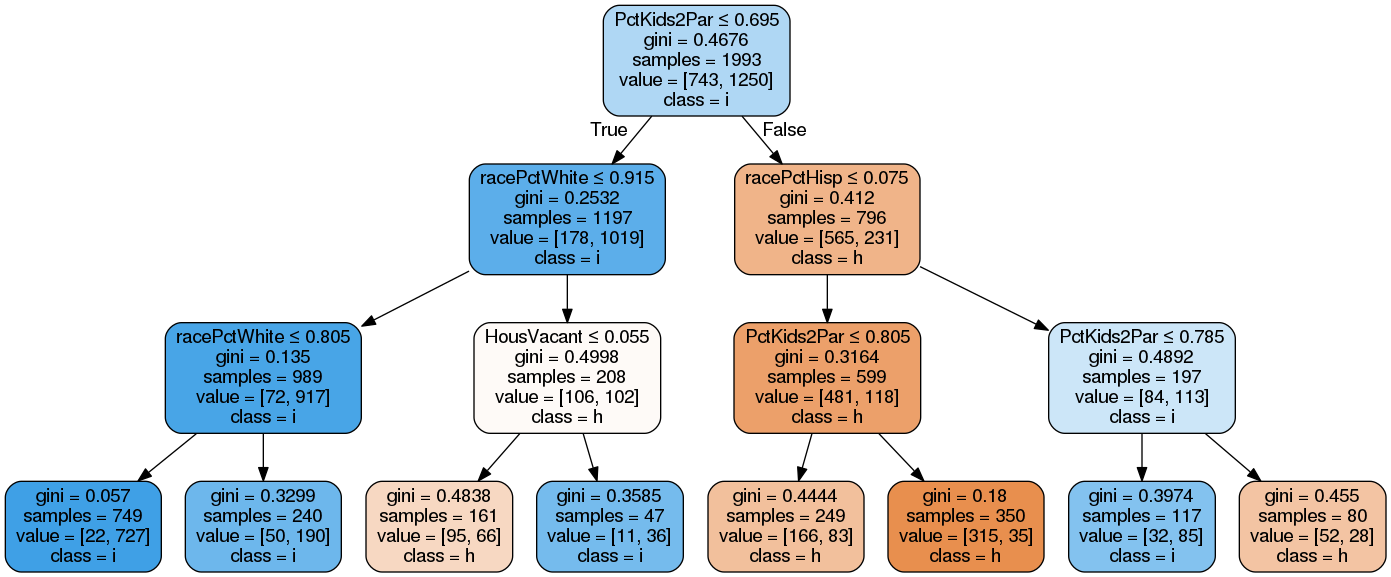

In [159]:
dot_data = tree.export_graphviz(dtclf, out_file=None, 
                         feature_names=list(X),  
                         class_names='highCrime',  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


### Conclusion: 
### 1.Top of the tree is the main feature-ie PctKids2Par. This is where the dataset is split with high prediction of high crime and low crime.
### 2. Since kids with two parents highly unlikely to commit crime. So here the highcrime and low crime split occurs when 69.5%. That is when PctKids2Par is less than 69.5%(True condition) then that subtree has lowcrime. Other 3 impotant feature are, since depth 3 tree is compareative low tree. : a) racePctWhite b)HousVacant c)racePctHisp

#### C. Prediction using the cross validating dataset

In [167]:
dt_acc_scores = cross_val_score(dtclf, X, y, cv=10, scoring='accuracy').mean()
dt_pre_scores = cross_val_score(dtclf, X, y, cv=10, scoring='precision').mean()
dt_rec_scores = cross_val_score(dtclf, X, y, cv=10, scoring='recall').mean()

In [168]:
print(dt_acc_scores);print(dt_pre_scores);print(dt_rec_scores);

0.798243718593
0.843267479959
0.8392


### Conclusion: 
### From the above validation curve, as the depth increases(from depth=3), the train accuracy increases but the cross validation stop increasing due to overfitting.

# 2.Linear Classification
---------

a. GaussianNB Model:
----

### 2.i) 10 Fold CV:


In [170]:
gnb = GaussianNB()
gnb_acc_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean()
gnb_pre_scores = cross_val_score(gnb, X, y, cv=10, scoring='precision').mean()
gnb_rec_scores = cross_val_score(gnb, X, y, cv=10, scoring='recall').mean()


print ('Accuracy is', gnb_acc_scores)
print ('Precision is', gnb_pre_scores)
print ('Recall is', gnb_rec_scores)

Accuracy is 0.761608040201
Precision is 0.911799814828
Recall is 0.692


### ii ) 10 most predictive features:

#### Creating a dataframe with the response variable:

In [172]:
count = 0
dictPredFeat = {}
for column in X:
    meanTrue = X[y == 1][column].mean()
    meanFalse = X[y == 0][column].mean()
    varTrue = X[y == 1][column].var()
    varFalse = X[y == 0][column].var()
    if(column != 'highCrime'):
        predScore = abs((meanTrue - meanFalse))/(math.sqrt(varFalse)+math.sqrt(varTrue))
        dictPredFeat[column] = predScore


#### Sort and print the Top 10 features:

In [180]:
TopTenFeat = sorted(dictPredFeat.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    print(i)

('MalePctDivorce', 0.61653424375792976)
('PctTeen2Par', 0.64262080203356542)
('pctWInvInc', 0.6607203219208595)
('PctYoungKids2Par', 0.66467055359810057)
('TotalPctDiv', 0.67428231626754376)
('FemalePctDiv', 0.6936040623575479)
('PctIlleg', 0.70892910606452808)
('racePctWhite', 0.73488405223793263)
('PctFam2Par', 0.74516152011996872)
('PctKids2Par', 0.80933642163183406)


### iii) Comparison with Decision Tree:

#### Conclusion: It is similar to the decision Tree.

## 2.b) LinearSVC:
   --------

In [200]:
svmclf = svm.SVC(kernel='linear', C =1.0)
lsvc_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
lsvc_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
lsvc_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', lsvc_acc_scores)
print ('Precision is', lsvc_pre_scores)
print ('Recall is', lsvc_rec_scores)

Accuracy is 0.804753768844
Precision is 0.855179372789
Recall is 0.8376


### 2.B) Absolute feature weights( ie the coefficients of the hyperplance vector)

In [201]:
svmclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
TopTenFeat_SVM = {}
count = 0
ls = list()
for i in X.columns:
    TopTenFeat_SVM[i] = abs(svmclf.coef_[0][count])
    count = count+ 1

TopTenFeat = sorted(TopTenFeat_SVM.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    ls.append(i[0])

In [239]:
ls

['agePct12t21',
 'RentHighQ',
 'PersPerOccupHous',
 'MalePctDivorce',
 'population',
 'PctFam2Par',
 'racepctblack',
 'PctKids2Par',
 'racePctWhite',
 'pctWInvInc']

In [244]:
X[ls]

,agePct12t21,RentHighQ,PersPerOccupHous,MalePctDivorce,population,PctFam2Par,racepctblack,PctKids2Par,racePctWhite,pctWInvInc
0,0.41,0.25,0.65,0.31,0.01,0.81,0.21,0.79,0.83,0.38
1,0.47,0.08,0.43,0.42,0.01,0.48,0.55,0.43,0.57,0.27
2,0.41,0.13,0.36,0.69,0.03,0.28,0.86,0.24,0.30,0.28
3,0.39,0.15,0.38,0.47,0.01,0.63,0.35,0.62,0.71,0.36
4,1.00,0.26,0.25,0.09,0.04,0.55,0.32,0.53,0.70,0.47
5,0.43,0.09,0.47,0.70,0.04,0.19,1.00,0.14,0.10,0.14
6,0.41,0.15,0.38,0.75,0.41,0.18,1.00,0.16,0.02,0.21
7,0.38,0.11,0.27,0.54,0.01,0.63,0.00,0.63,0.99,0.41
8,0.35,0.33,0.42,0.47,0.00,0.74,0.31,0.74,0.75,0.54
9,0.39,0.20,0.40,0.53,0.06,0.60,0.32,0.59,0.73,0.41


### iii) Comparison with Decision Tree:


#### conclusion: The Results are different, however, they share 3 features are in the same or really simlar. We can check correlation matrix. HouseVacn has .89 correlation within Population. Thus Main Features are similar with the decision Tree. 

In [248]:
X.corr()[ls].ix[['PctKids2Par','racePctWhite','HousVacant','racePctHisp']]

,agePct12t21,RentHighQ,PersPerOccupHous,MalePctDivorce,population,PctFam2Par,racepctblack,PctKids2Par,racePctWhite,pctWInvInc
PctKids2Par,-0.148922,0.500158,0.265954,-0.710124,-0.274154,0.985327,-0.735622,1.000000,0.701368,0.744271
racePctWhite,-0.194137,0.119562,-0.215168,-0.341308,-0.301540,0.637265,-0.793863,0.701368,1.000000,0.595801
HousVacant,-0.047199,-0.072262,-0.167369,0.323930,0.896325,-0.344443,0.280897,-0.346290,-0.281461,-0.184022
racePctHisp,0.145783,0.059832,0.507974,0.062722,0.156149,-0.138050,-0.065837,-0.205878,-0.445371,-0.417612


# 3.Regression
---------

### a. Linear Regression:


In [22]:
y_reg = df['ViolentCrimesPerPop']
# print(y_reg)
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y_reg,None,scoring='neg_mean_squared_error',cv=10)

### a)Using 10-fold cross-validation, what is the estimated mean-squared-error (MSE) of the model?

In [106]:
print(np.abs(lr_scores.mean()))
# print(scores)

0.0200939693044


### II) What is the MSE on the training set

In [105]:
lr.fit(X,y_reg)
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X) - y_reg) ** 2))

Mean squared error: 0.02


### III) What features are most predictive of a high crime rate? A low crime rate?
-----------------


#### It’s easy to think that variables with larger coefficients are more important because they represent a larger change in the response.Since the features scale has been standardized, we can pick highest and lowest coefficent for the most predictive value.

In [25]:
print('Coefficients: \n', lr.coef_)
ls_coef_lr = np.array(lr.coef_)
max_feature = np.where(ls_coef_lr == ls_coef_lr.max())

Coefficients: 
 [  3.92893069e+00  -4.72988475e-01   7.12653984e-03  -3.07913352e-01
   8.00925727e-02   3.73350141e-01   3.38705557e-02   1.05751191e-01
   1.31793715e-01   4.09786934e-01  -2.83057873e+00   1.55829374e-01
  -1.01150012e+00  -4.04683340e-01   9.28910249e-02  -9.46254374e-01
  -3.29832636e-01  -1.01982922e-01   1.75570256e-02   9.26851094e-01
   3.68235781e-01  -1.60868569e-01  -3.90602631e-02   4.10138565e-02
  -5.49169780e-02   1.41410682e-01  -1.21712883e-01  -2.45149609e-01
  -1.24365346e-01  -7.22382606e-02  -7.32844884e-02  -4.92669766e-01
   3.02212207e-02   1.46580853e-01  -8.85614849e-02  -1.76563098e-01
   3.06366098e-02   7.43965217e-01   5.99112583e-01   9.22660049e-02
   4.34262821e-01  -6.51321368e-01  -1.71280681e-01   5.88978471e-02
  -1.23646334e+00   8.06257423e-02   2.74478983e-01  -2.20974836e-02
   9.12656982e-02  -8.47099742e-01  -8.41633406e-02  -1.73340558e-01
   1.80238493e-01  -2.35033456e-01  -1.37413185e-01   3.31179994e-01
  -5.69406383e-01 

#### Most predictive toward high crime:

In [26]:
X.columns[np.argmax(ls_coef_lr)]

'population'

####  Most predictive toward low crime :

In [27]:
X.columns[np.argmin(ls_coef_lr)]

'numbUrban'

## b.Ridge Regression
------------------

In [257]:
param_range = np.logspace(-3, 1, 5)
train_scores, test_scores = validation_curve(
    linear_model.Ridge (), X, y_reg, param_name="alpha", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


### II) What is the Estimated MSE 10 CV for each Alpha:

In [258]:
MSE_Train = {}
count = 0
for i in param_range:
    MSE_Train[i] = abs(train_scores_mean[count])
    count = count + 1
print(MSE_Train)

{0.10000000000000001: 0.016393356087984819, 1.0: 0.016640360379587462, 10.0: 0.017489846865817386, 0.01: 0.016358380007132474, 0.001: 0.016356965893595858}


### II) What is the MSE on the training set

In [261]:
MSE_Test = {}
count = 0
for i in param_range:
    MSE_Test[i] = abs(test_scores_mean[count])
    count = count + 1
print(MSE_Test)

{0.10000000000000001: 0.019919724939969477, 1.0: 0.019795021348172313, 10.0: 0.020034249797866499, 0.01: 0.020055955627512237, 0.001: 0.020089527317998793}


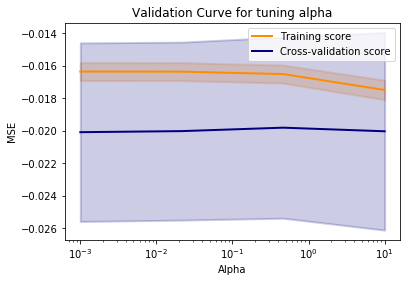

In [115]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [124]:
lrr = linear_model.Ridge(alpha = 0.001)

In [125]:
lrr.fit(X,y_reg)

Ridge(alpha=10000000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(X) - y_reg) ** 2))

Mean squared error: 0.05


polynomial features
--------

In [33]:
poly = PolynomialFeatures(degree  = 2,interaction_only = False)
poly_init = poly.fit_transform(X)

param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(
    PolynomialFeatures(), initial, Y, param_name="degree", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)

Crete polynomial feature

In [34]:
lrr.fit(poly_init,y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(poly_init) - y_reg) ** 2))

Mean squared error: 0.30


In [36]:
df_poly = pd.DataFrame(poly_init)

In [37]:
X.shape

(1993, 100)

In [38]:
poly_init.shape

(1993, 5151)

In [39]:
lrr = linear_model.Ridge(alpha = 0.001)
scores = cross_val_score(lrr, poly_init, y_reg,None,scoring='mean_squared_error',cv=10,n_jobs = -1)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.5/dist-packages/sklearn/metri

In [40]:
scores

array([-0.14227491, -0.13626447, -0.18361291, -0.09502172, -0.07243209,
       -0.1266391 , -0.08427071, -0.06765191, -0.16015351, -0.12677151])

In [41]:
print(scores.mean())

-0.119509285845


# 4.Dirty Data
---------

#### Finding the extra features

In [42]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)


array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [43]:
dfd = pd.read_csv(dicPathDirty)


There 2 Way to replace ? mark. 1. replace  2. appmap
1.

In [44]:
dfd_clean = dfd.replace('?',np.nan)

In [45]:
y_train = np.where(dfd_clean['ViolentCrimesPerPop']>0.1, 1, 0)
del dfd_clean['communityname']
del dfd_clean['county']
del dfd_clean['community']
del dfd_clean['state']
del dfd_clean['ViolentCrimesPerPop']
del dfd_clean['fold']

In [46]:
cols_numeric = dfd_clean.columns

In [47]:
imputer = Imputer(missing_values = np.nan,
                                          strategy="mean",
                                          axis=0)

In [48]:
dfd_clean = imputer.fit_transform(dfd_clean)
dfd_clean = pd.DataFrame(dfd_clean)
dfd_clean.columns = cols_numeric

In [49]:
np.random.seed(40)

In [50]:
dfd_cleanclf = tree.DecisionTreeClassifier(max_depth= 3)
scores = cross_val_score(dfd_cleanclf, dfd_clean,y_train,None,scoring='accuracy',cv=10)

In [51]:
print(scores.mean())

0.812946286157


# 5. TEAM WORK
---------

## RadomForeset
--------------------------

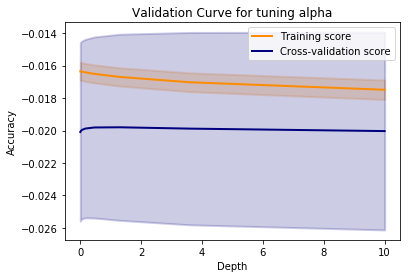

In [52]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",
#             color="darkorange", lw=lw)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [53]:
rf_clf = RandomForestClassifier(random_state=100, max_depth=3)

rf_acc_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy').mean()
rf_pre_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='precision').mean()
rf_rec_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='recall').mean()

In [54]:
print ('Accuracy is', rf_acc_scores)
print ('Precision is', rf_pre_scores)
print ('Recall is', rf_rec_scores)

Accuracy is 0.801253768844
Precision is 0.83338783622
Recall is 0.8616


In [55]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Nonlinear SVM
---------------------

Fine tuning Panelty coefficient => We pick C = 46

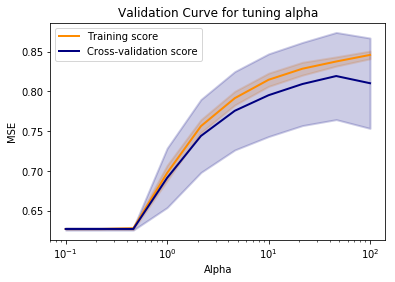

In [56]:
param_range = np.logspace(-1, 2, 10)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='poly'), X, y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [57]:
test_scores_mean

array([ 0.62719849,  0.62719849,  0.62719849,  0.69139698,  0.74406281,
        0.77566332,  0.79523116,  0.80928894,  0.81932412,  0.81029397])

In [58]:
param_range

array([   0.1       ,    0.21544347,    0.46415888,    1.        ,
          2.15443469,    4.64158883,   10.        ,   21.5443469 ,
         46.41588834,  100.        ])

In [59]:
svmclf = svm.SVC(kernel='poly', C =46)
nsvm_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
nsvm_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
nsvm_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', nsvm_acc_scores)
print ('Precision is', nsvm_pre_scores)
print ('Recall is', nsvm_rec_scores)

Accuracy is 0.818319095477
Precision is 0.851133123637
Recall is 0.8696



## i. Summery for All classification
----------------------------

In Classification , we apply:


a)Decision Tree
b)Random forest
c)LinearSVC
d)Polynomial kernal SVM


In [60]:
ls = [[],[]]

# Extra Credit: K-Means
---------

In [61]:
from sklearn.cluster import KMeans
kmClf = KMeans(n_clusters = 2)
km_acc_scores = cross_val_score(kmClf, X, y, cv=10, scoring='accuracy').mean()
km_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
km_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', km_acc_scores)
print ('Precision is', km_acc_scores)
print ('Recall is', km_acc_scores)

Accuracy is 0.533331658291
Precision is 0.533331658291
Recall is 0.533331658291


#### The above K-Means is not the perfect model for labeled data that predicts a category
#### Hence it shows varriying cross validated metrics mean value on each run

# Comparasion 
------------------------------




## Classification
----------------------------

In Classification , we apply:


a)Decision Tree
b)Random forest
c)LinearSVC
d)Polynomial kernal SVM
e)K-mean



## Regession
------------------------
a)Linear Regression
b)Linar Ridge Regression
c)Polynomial Regression


## Accuracy Graph for Each Model:
-------------------------------

### Best classification model based on Accuracy metrics on the clean dataset:

In [62]:
names = ["Decision Tree","Gaussian NB", "Linear SVM", "Nonlinear SVM" ,"Random Forest"]
acc_scores_list = [dt_acc_scores,
gnb_acc_scores,
lsvc_acc_scores,
rf_acc_scores,
nsvm_acc_scores
]
pre_scores_list = [dt_pre_scores,
gnb_pre_scores,
lsvc_pre_scores,
rf_pre_scores,
nsvm_pre_scores
]
rec_scores_list = [dt_rec_scores,
gnb_rec_scores,
lsvc_rec_scores,
rf_rec_scores,
nsvm_rec_scores
]


F1_scores_list = stats.hmean([ rec_scores_list , pre_scores_list ])

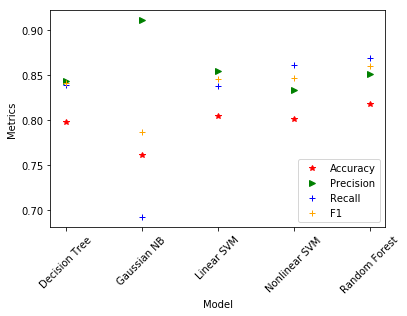

In [63]:
#plot:
xaxisRange = range(5)
plt.xticks(xaxisRange, names)
plt.xticks(xaxisRange, names, rotation=45)
# plt.legend()

plt.plot(xaxisRange,acc_scores_list,'*',color="Red",label="Accuracy")
plt.plot(xaxisRange,pre_scores_list,'>',color="green",label="Precision")
plt.plot(xaxisRange,rec_scores_list,'+',color="Blue",label="Recall")
plt.plot(xaxisRange,F1_scores_list,'+',color="orange",label="F1")
plt.xlabel('Model')
plt.ylabel('Metrics')
legend = plt.legend()

### conclusion: